## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [3]:
data=pd.read_csv('https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2023/homeworks/hw03-plots/german_credit.csv', sep=',',)
data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [4]:
data.tail()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [5]:
data.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   object
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   object
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

Количественные данные:
* duration
* amount
* age

Бинарные:
* telephone
* foreign_worker
* credit_risk

Порядковые:
* present_residence
* status
* savings
* employment_duration
* installment_rate
* job
* people_liable
* credit_history
* number_credits

Категориальные:
* purpose
* personal_status_sex
* other_debtors
* property
* other_installment_plans
* housing


### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [4]:
data.groupby(by = 'purpose')['amount'].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [7]:
(data[data.age<30]['housing']=='rent').mean()*100

66.66666666666666

In [5]:
(data[data.age>40]['housing']=='rent').mean()*100

68.01470588235294

### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [8]:
((data['foreign_worker']=='yes') & ((data['number_credits']=='4-5') | (data['number_credits']=='>=6'))).sum()

1

### Задание 6 (1 балл)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

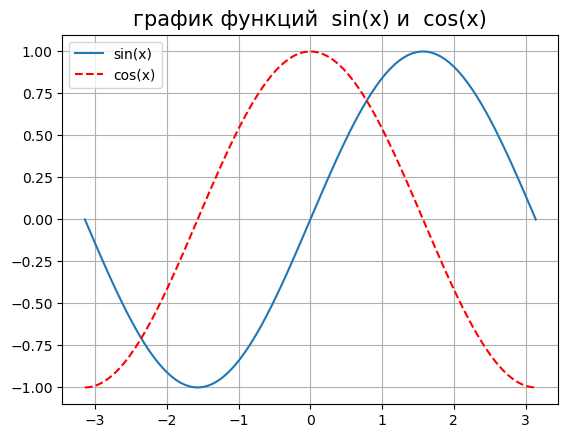

In [9]:
x=np.linspace(-np.pi, np.pi, 100)
y1=[np.sin(i) for i in x]
y2=[np.cos(i) for i in x]
plt.grid()
plt.title('график функций  sin(x) и  cos(x)', fontsize=15)
plt.plot(x, y1, label = 'sin(x)') 
plt.plot(x, y2, 'r--', label = 'cos(x)')
plt.legend()

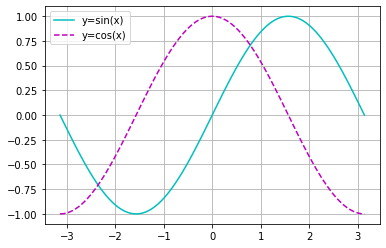

In [8]:
# your code here

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

In [10]:
y=[ '... >= 200 DM / salary for at least 1 year', '0<= ... < 200 DM', '... < 0 DM', 'no checking account']
x1 = data[data.credit_risk == 'good'].groupby(by = 'status')['age'].count()
x2 = data[data.credit_risk == 'bad'].groupby(by = 'status')['age'].count()

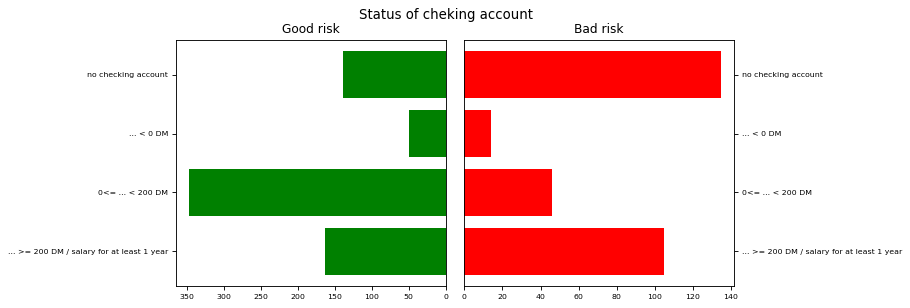

In [19]:
fig, (ax, ay) = plt.subplots(nrows= 1 , ncols= 2, figsize=(9, 4), dpi=80)

ax.barh(y, x1, color = 'g', label = 'good risk')
ax.set_title('Good risk', fontsize = 11)
ax.tick_params(axis='both', which='major', labelsize=7)
ax.invert_xaxis()

ay.barh(y, x2, color = 'r')
ay.yaxis.tick_right()
ay.set_title('Bad risk', fontsize = 11)
ay.tick_params(axis='both', which='major', labelsize=7)

fig.suptitle('Status of cheking account', fontsize=12)
plt.subplots_adjust(wspace = 0.07, )

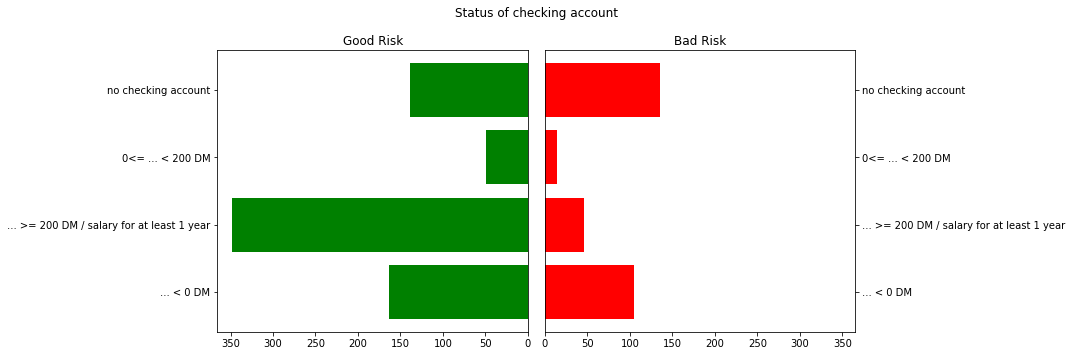

In [9]:
# your code here

### Задание 8  (0.5 балла)

In [10]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

<AxesSubplot:xlabel='savings', ylabel='count'>

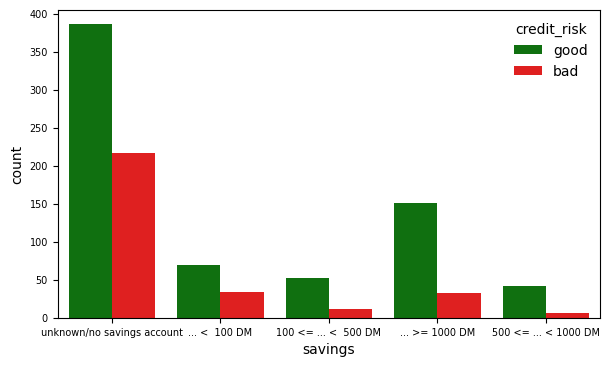

In [20]:
colour = {'good' : 'g', 'bad' : 'r' }
sns.set_context({'xtick.labelsize': 7,
                 'ytick.labelsize': 7,
                 'figure.figsize': (7, 4),
                 'patch.linewidth': 0.0
                })
sns.countplot(x="savings", hue = 'credit_risk', data=data, palette = colour)


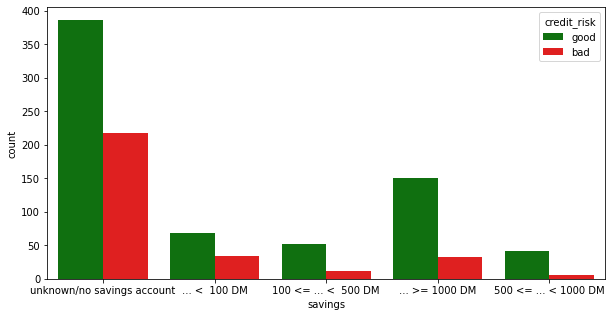

In [11]:
# your code here

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

<AxesSubplot:xlabel='savings', ylabel='age'>

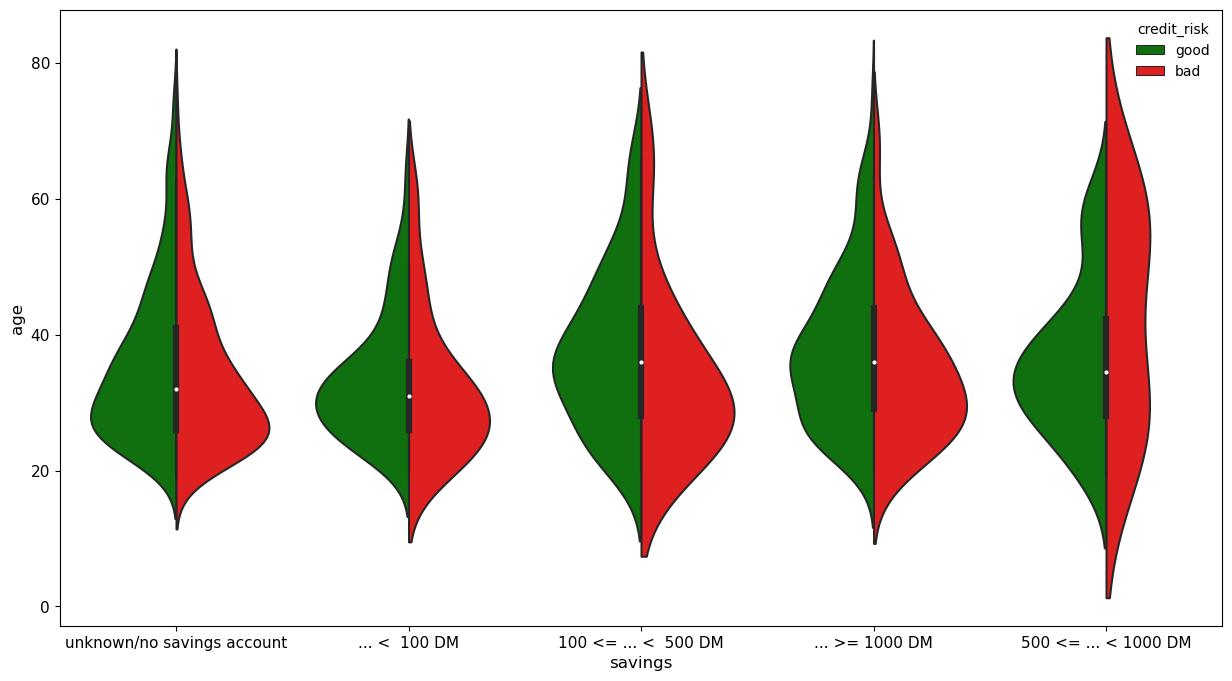

In [21]:
plt.figure(figsize=(15, 8))
sns.set_context({'xtick.labelsize': 11,
                 'ytick.labelsize': 11,
                 'axes.labelsize': 12,
                })
sns.violinplot(x="savings", y="age", hue="credit_risk",
 palette=colour, split=True, data=data)

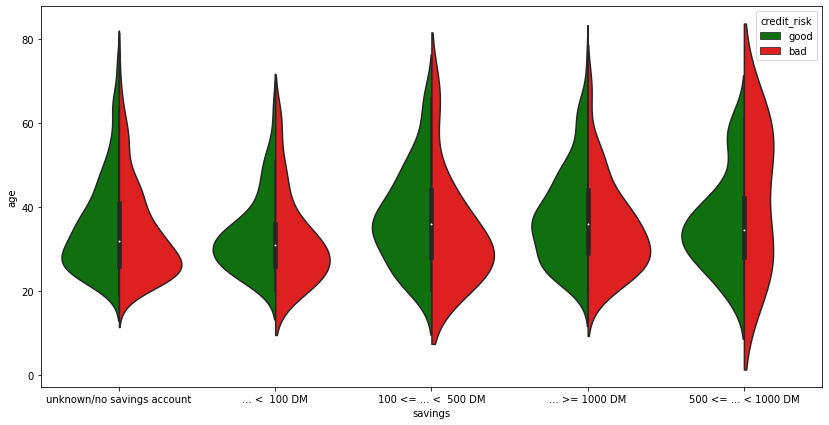

In [12]:
# your code here

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

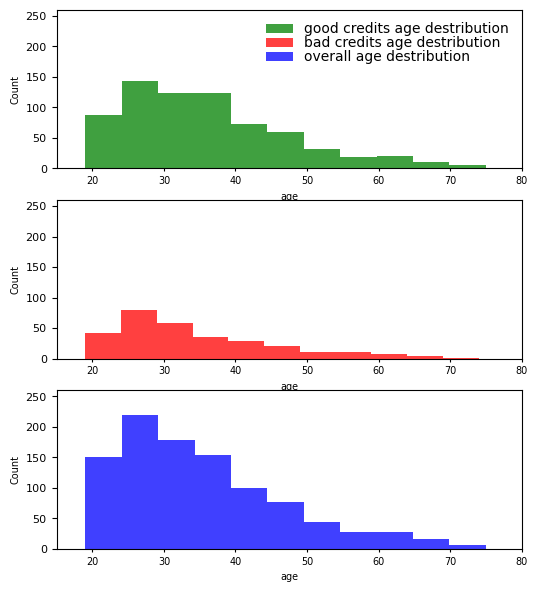

In [22]:
sns.set_context({
    'xtick.labelsize': 7,
    'ytick.labelsize': 8,
    'axes.labelsize': 7,
    'xtick.major.size': 2,
    'patch.linewidth': 0.0
})
plt.subplots(3,1 , figsize=(6, 7))

plt.subplot(3, 1, 1)
sns.histplot(x="age", data=data[data.credit_risk=='good'], color = 'green', label = 'good credits age destribution', bins =11)
plt.axis([15, 80, 0, 260])

plt.subplot(3, 1, 2)
sns.histplot(x="age", data=data[data.credit_risk=='bad'], color = 'red', label = 'bad credits age destribution', bins =11)
plt.axis([15, 80, 0, 260])

plt.subplot(3, 1, 3)
sns.histplot(x="age", data=data, color = 'blue', bins =11)
plt.axis([15, 80, 0, 260])

labels = ["good credits age destribution", "bad credits age destribution", "overall age destribution"]
plt.figlegend(labels, bbox_to_anchor = (0.9, 0.88), ncol=1, labelspacing=0.)

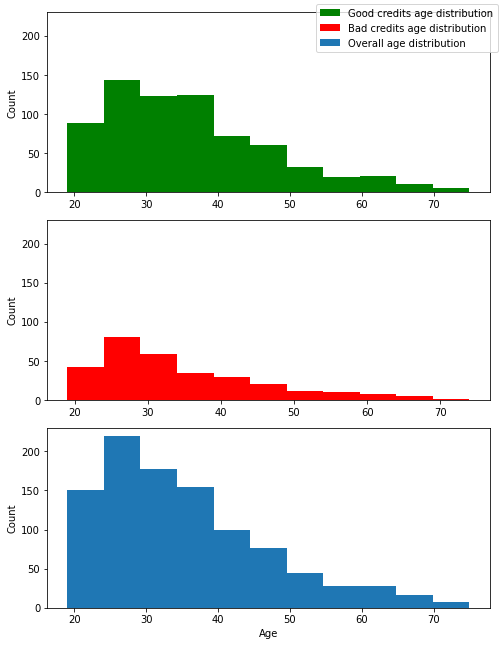

In [13]:
# your code here

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

<AxesSubplot:xlabel='amount', ylabel='duration'>

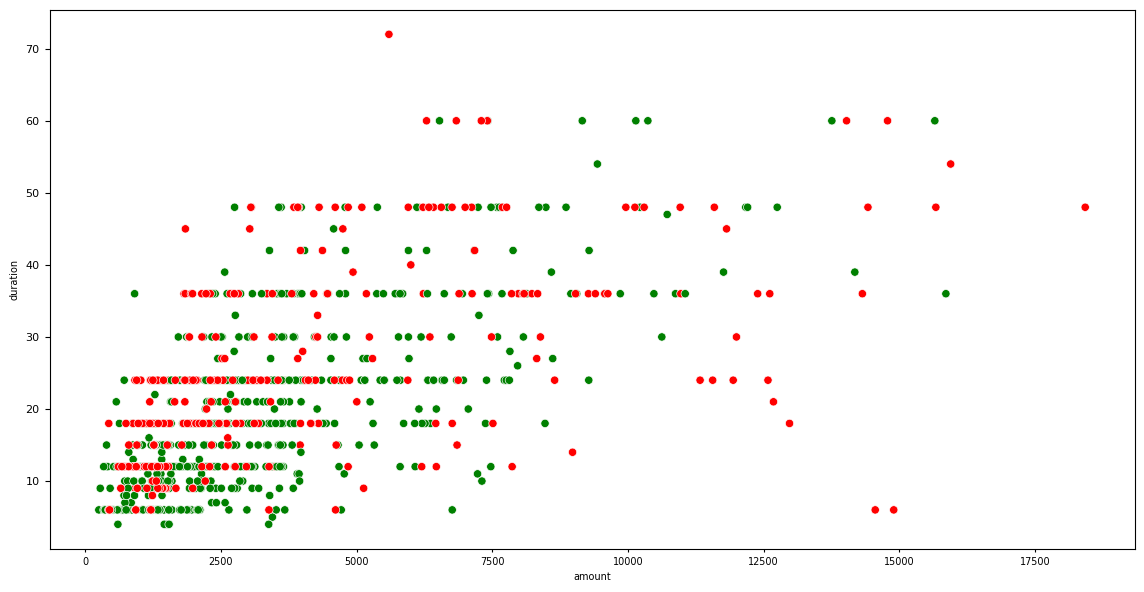

In [23]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x='amount', y='duration',hue = 'credit_risk', data=data, palette = colour, legend = False)

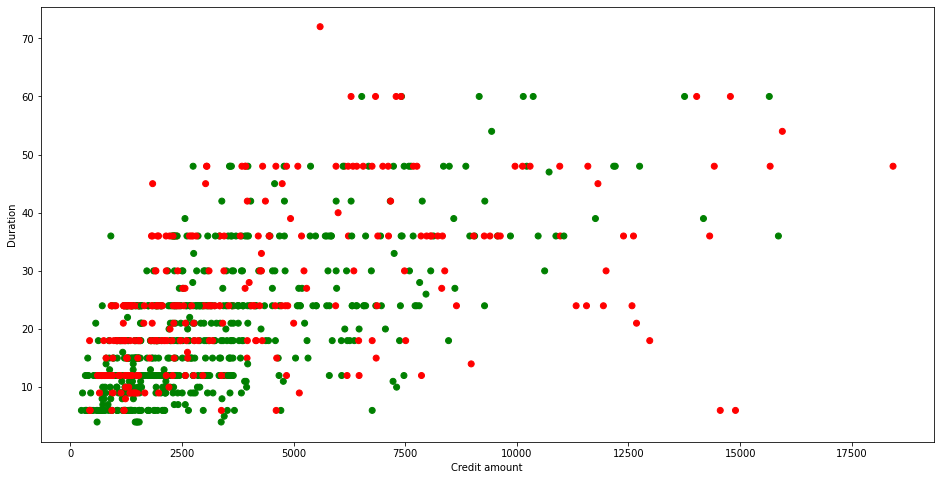

In [21]:
# your code here

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

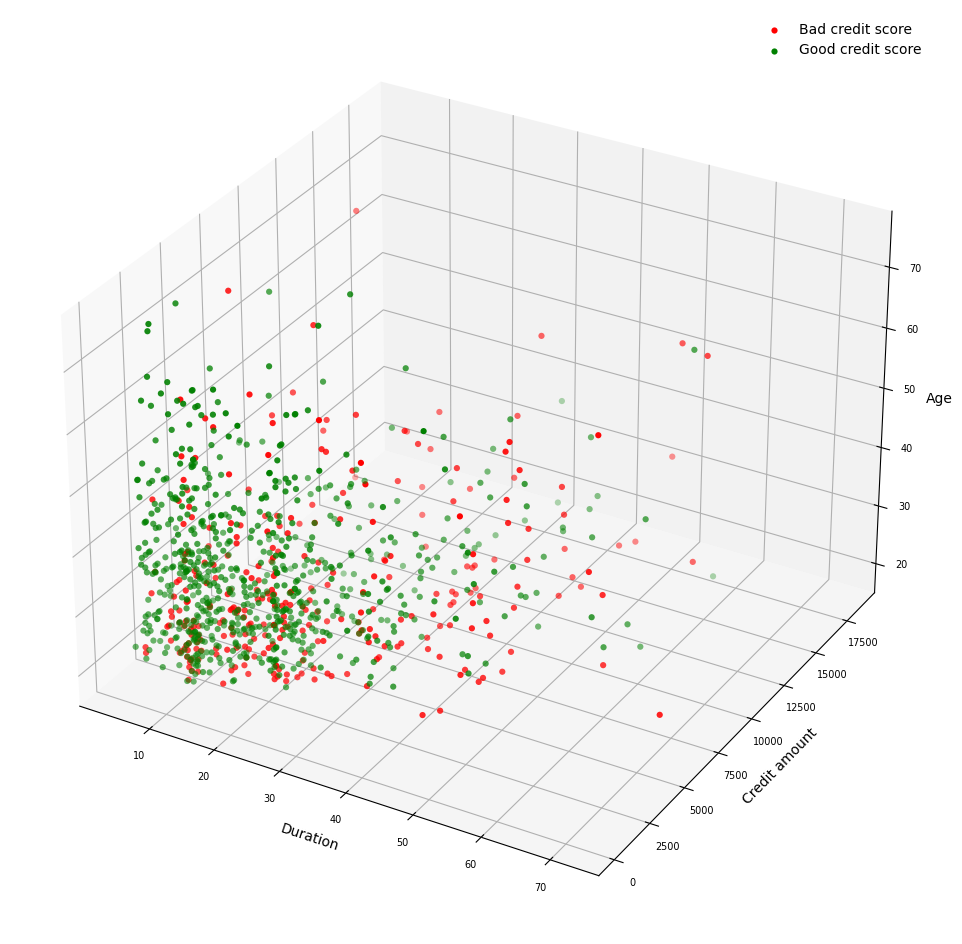

In [24]:


fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.scatter(data = data[data.credit_risk == 'bad'], xs = 'duration', ys = 'amount', zs = 'age', color = 'r', label = 'Bad credit score')
ax.scatter(data = data[data.credit_risk == 'good'], xs = 'duration', ys = 'amount', zs = 'age', color = 'g', label = 'Good credit score')

ax.set_xlabel('Duration', fontsize=10)
ax.set_ylabel('Credit amount', fontsize=10)
ax.set_zlabel('Age', fontsize=10)
ax.legend(fontsize=10)

plt.show()

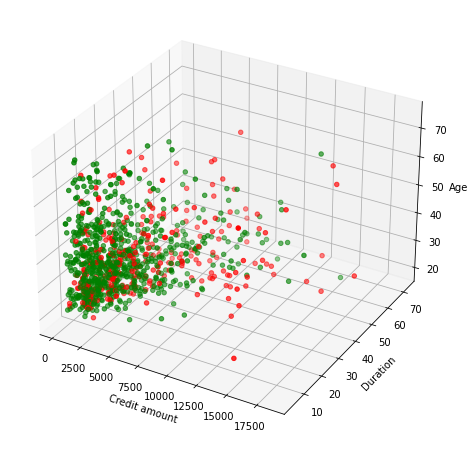

In [15]:
# your code here

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [25]:
dict = {
'present_residence' : {'< 1 yr': 0, '1 <= ... < 4 yrs': 1,'4 <= ... < 7 yrs': 2, '>= 7 yrs': 3},
'status' : {'no checking account': 0, '... < 0 DM' : 1, '0<= ... < 200 DM': 2, '... >= 200 DM / salary for at least 1 year' : 3},
'savings' : {'unknown/no savings account': 0, '... <  100 DM': 1,'100 <= ... <  500 DM': 2, '500 <= ... < 1000 DM': 3,'... >= 1000 DM':4 },
'employment_duration' : {'unemployed' : 0, '< 1 yr' : 1, '1 <= ... < 4 yrs' : 2,'4 <= ... < 7 yrs': 3, '>= 7 yrs': 4},
'installment_rate' : {'< 20': 3, '20 <= ... < 25':2, '25 <= ... < 35': 1, '>= 35': 0},
'job' : {'unemployed/unskilled - non-resident' : 0, 'unskilled - resident': 1,'skilled employee/official': 2, 'manager/self-empl./highly qualif. employee':3},
'people_liable' :{'0 to 2': 0,'3 or more':1 },
'credit_history' : {'no credits taken/all credits paid back duly': 5,'all credits at this bank paid back duly':4, 'existing credits paid back duly till now':3, 'delay in paying off in the past': 2,'delay in paying off in the past': 1, 'critical account/other credits elsewhere': 0},
'number_credits' : {'1': 3, '2-3': 2,'>= 6':0,'4-5': 1}   ,
'telephone' : {'yes (under customer name)' : 1, 'no' : 0},
'foreign_worker' : {'no': 0, 'yes': 1},
'credit_risk' : {'bad' : 0, 'good' : 1}
       }

In [26]:
data = data.replace(dict)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,0,18,4,car (used),1049,0,1,3,female : non-single or male : single,none,...,car or other,21,none,for free,3,2,0,0,0,1
1,0,9,4,others,2799,0,2,1,male : married/widowed,none,...,unknown / no property,36,none,for free,2,2,1,0,0,1
2,1,12,5,retraining,841,1,3,1,female : non-single or male : single,none,...,unknown / no property,23,none,for free,3,1,0,0,0,1
3,0,12,4,others,2122,0,2,2,male : married/widowed,none,...,unknown / no property,39,none,for free,2,1,1,0,1,1
4,0,12,4,others,2171,0,2,3,male : married/widowed,none,...,car or other,38,bank,rent,2,1,0,0,1,1


In [28]:
data = data.drop(columns = ['purpose',
'personal_status_sex',
'other_debtors',
'property',
'other_installment_plans',
'housing'])

KeyError: "['purpose', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans', 'housing'] not found in axis"

In [29]:
data.head()

,status,duration,credit_history,amount,savings,employment_duration,installment_rate,present_residence,age,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,0,18,4,1049,0,1,3,3,21,3,2,0,0,0,1
1,0,9,4,2799,0,2,1,1,36,2,2,1,0,0,1
2,1,12,5,841,1,3,1,3,23,3,1,0,0,0,1
3,0,12,4,2122,0,2,2,1,39,2,1,1,0,1,1
4,0,12,4,2171,0,2,3,3,38,2,1,0,0,1,1


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [ ]:
data.drope('telephone')

In [30]:
def predict(Xtest: np.array) -> np.array:
    return (Xtest[:, 9] > 1)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
# Используйте X_train и y_train на ваше усмотрение
# your code here
accuracy_score(y_test, predict(X_test))

C:\Users\user\AppData\Local\Temp\ipykernel_3420\2295369804.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data.drop('credit_risk', 1).values


0.648

Либо Константный прогноз :)

In [31]:
def predict(Xtest: np.array) -> np.array:
    return (Xtest[:, 9] > -1)

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
means=np.mean(X, axis=0)
skos=np.var(X, axis=0)

accuracy_score(y_test, predict(X_test))

C:\Users\user\AppData\Local\Temp\ipykernel_3420\30283603.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data.drop('credit_risk', 1).values


0.66

Была еще идея для каждого уровня всех посчитать разность между частью good credit_risk и bad credit_risk, запомнить эти значения
и для тестовой просто складывать по принадлежности к уровню, но до реализации не дошёл :(